In [731]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [732]:
data = pd.read_csv("../../datas/IEA Global EV Data 2024 new.csv", header = 0, delimiter = ",")
data

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"
...,...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55,"5500,00%"
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31,"3100,00%"
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000,"940000000,00%"
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000,"1500000000,00%"


In [733]:
data['value'] = pd.to_numeric(data['value'], errors='coerce')
data['percentage'] = pd.to_numeric(data['percentage'], errors='coerce')

In [734]:
data = data[["year", "value"]].copy()
data

,year,value
0,2010,350.0
1,2010,NaN
2,2010,3.0
3,2010,7.0
4,2010,62.0
...,...,...
12649,2035,55.0
12650,2035,31.0
12651,2035,9400000.0
12652,2035,15000000.0


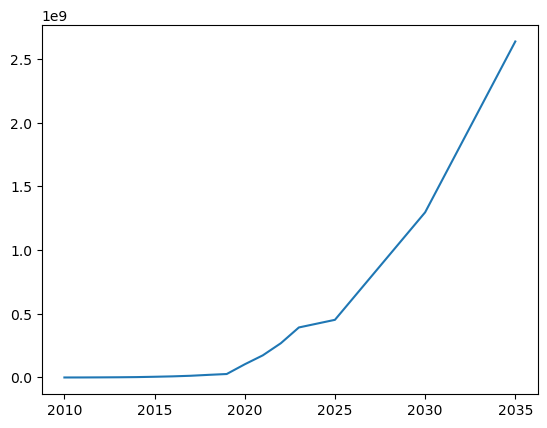

In [735]:
data = data.groupby("year").sum().reset_index()
plt.plot(data["year"], data["value"])
plt.show()

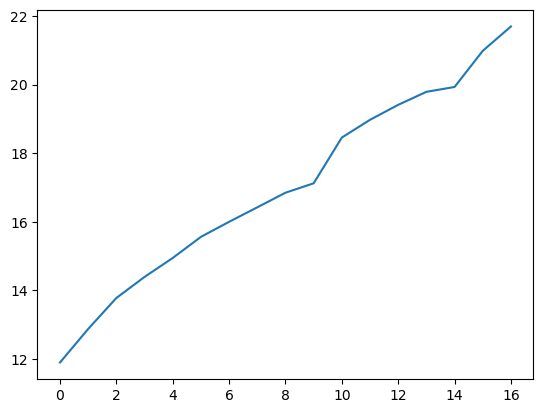

In [736]:
data["value"] = np.log(data["value"])
data["value"].plot()
plt.show()

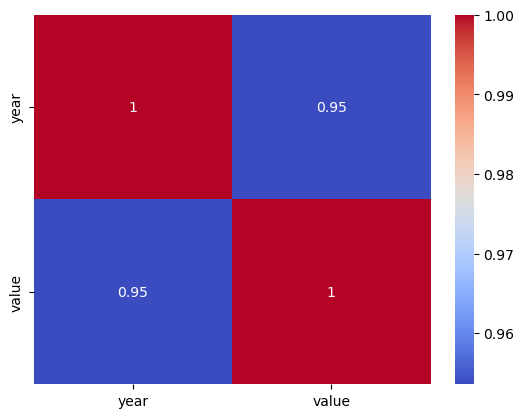

In [737]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [738]:
data.sort_values(by = "year", ascending = True, inplace = True)
data

,year,value
0,2010,11.902600
1,2011,12.880464
2,2012,13.782187
3,2013,14.395635
4,2014,14.947994
5,2015,15.562877
6,2016,16.001280
7,2017,16.423587
8,2018,16.849307
9,2019,17.123625


In [739]:
X = data[["year"]]
y = data["value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [740]:
model_fit = LinearRegression().fit(X_train, y_train)
y_pred = model_fit.predict(X_test)

In [741]:
model_fit.coef_, model_fit.intercept_

(array([0.37408611]), -737.988844736489)

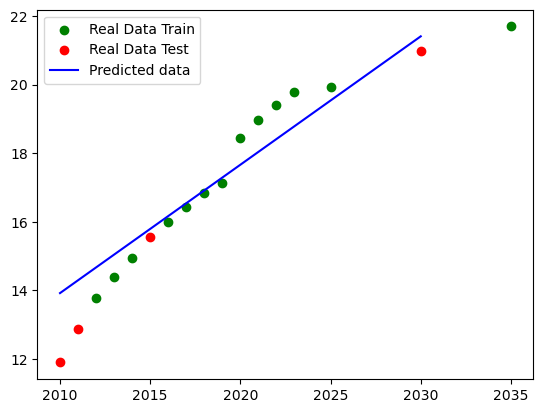

In [742]:
plt.scatter(X_train, y_train, color = 'green', label = 'Real Data Train')
plt.scatter(X_test, y_test, color = 'red', label = 'Real Data Test')
plt.plot(X_test, y_pred, color = 'blue', label = 'Predicted data')
plt.legend()
plt.show()

In [743]:
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_percentage_error(y_test, y_pred)

(1.0236318644567501, 1.5825511290463616, 0.07874785331182144)

In [744]:
r2_score(y_test, y_pred)

0.8727719136819718

In [745]:
X_feature = pd.DataFrame({"year": [2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040]})

In [746]:
y_pred_feature = model_fit.predict(X_feature)
y_pred_feature

array([21.40596018, 21.78004629, 22.15413241, 22.52821852, 22.90230463,
       23.27639074, 23.65047685, 24.02456296, 24.39864907, 24.77273518,
       25.14682129])

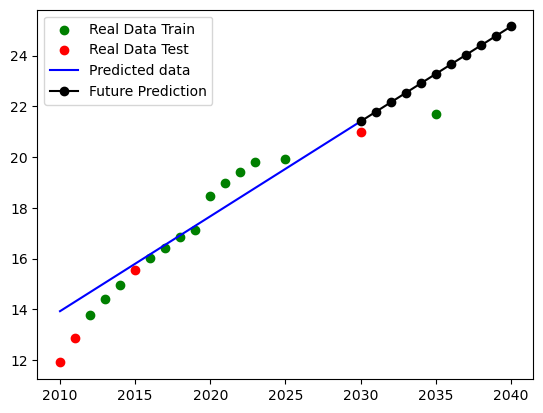

In [747]:
plt.scatter(X_train, y_train, color = 'green', label = 'Real Data Train')
plt.scatter(X_test, y_test, color = 'red', label = 'Real Data Test')
plt.plot(X_test, y_pred, color = 'blue', label = 'Predicted data')
plt.plot(X_feature, y_pred_feature, color = 'black', label = 'Future Prediction', marker = 'o')
plt.legend()
plt.show()